In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing

import sys
sys.path.append("../")
import utils.dataloader as dataloader


In [31]:
dfload = dataloader.loadData("../../data/load1011.csv")
dfprice = dataloader.loadPrice("../../data/price.csv")
dfmix = dataloader.loadMix("../../data/fuel2021.csv")
load, pv, price, mix = dataloader.get_customer_data(dfload,dfprice,dfmix,1)

In [47]:
dfload = dataloader.loadData("../../data/load1112.csv")
dfprice = dataloader.loadPrice("../../data/price.csv")
dfmix = dataloader.loadMix("../../data/fuel2021.csv")
customer = 1

customer_all_data = dfload[(dfload['Customer'] == customer)]
customer_reduced_data = customer_all_data.drop(columns=['Customer', 'Generator Capacity', 'Postcode', 'Row Quality'])
gc = customer_reduced_data[customer_reduced_data['Consumption Category'] == 'GC'].set_index(pd.RangeIndex(0, 365)) \
    .drop(columns=['Consumption Category', 'date'])
if len(customer_reduced_data[customer_reduced_data['Consumption Category'] == 'CL']) != 0:
    cl = customer_reduced_data[customer_reduced_data['Consumption Category'] == 'CL'].set_index(
        pd.RangeIndex(0, 365)).drop(columns=['Consumption Category', 'date'])
values = pd.DataFrame()
customer_load_data = pd.DataFrame(columns=gc.columns)
for day in range(0, 365):
    values.iloc[0:0]
    values['gc'] = gc.iloc[day]
    if len(customer_reduced_data[customer_reduced_data['Consumption Category'] == 'CL']) != 0:
        values['cl'] = cl.iloc[day]
    else:
        values['cl'] = 0.0
    summed_values = values.sum(axis=1)
    customer_load_data.loc[day] = summed_values.T
customer_pv_data = customer_reduced_data[customer_reduced_data['Consumption Category'] == 'GG'].set_index(
    pd.RangeIndex(0, 365)) \
    .drop(columns=['Consumption Category', 'date'])
price_data = dfprice.drop(columns=['REGION', 'SETTLEMENTDATE', 'TOTALDEMAND', 'PERIODTYPE']).div(1000)
load_array = pd.DataFrame(np.array(customer_load_data).flatten())
pv_array = pd.DataFrame(np.array(customer_pv_data).flatten())
price_array = pd.DataFrame(np.array(price_data).flatten())

pv_array

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
17515,0.0
17516,0.0
17517,0.0
17518,0.0


In [30]:
current_timeslot = 0
dataloader.loadData("../../data/load1112.csv")
load
# pv[current_timeslot]
# price[current_timeslot]
# mix.iloc[current_timeslot]

,0
0,1.553
1,1.715
2,1.339
3,0.865
4,0.380
...,...
17880,0.458
17881,0.685
17882,0.650
17883,1.744


In [16]:
mix

,Biomass [MWh] Original resolutions,Hydropower [MWh] Original resolutions,Wind offshore [MWh] Original resolutions,Wind onshore [MWh] Original resolutions,Photovoltaics [MWh] Original resolutions,Other renewable [MWh] Original resolutions,Nuclear [MWh] Original resolutions,Lignite [MWh] Original resolutions,Hard coal [MWh] Original resolutions,Fossil gas [MWh] Original resolutions,Hydro pumped storage [MWh] Original resolutions,Other conventional [MWh] Original resolutions
0,2197.0,6655,89500.0,7111.0,0.0,730,2626.25,3803.75,75050.0,3573.75,54050.0,48250
1,2193.0,11440,80037.0,7066.0,0.0,730,2634.75,3613.75,73400.0,3572.25,45700.0,48250
2,2187.25,62179,144150.0,7197.0,0.0,4040,2642.25,3327.5,7260.0,3595.0,43122.0,48250
3,2181.25,116350,68879.0,7171.75,0.0,7350,2644.75,3298.5,72100.0,3591.0,783.0,482
4,2180.75,63340,69212.0,7092.25,0.0,7350,2644.5,3156.75,36034.0,3638.25,77350.0,24366
...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2141.5,113500,92400.0,3766.75,3.0,3510,3314.0,6147.0,0.0,4098.5,26980.0,70100
17516,2100.25,121750,41550.0,3866.75,0.0,3510,3314.25,5978.0,0.0,4066.75,38750.0,68850
17517,2088.75,113300,44470.0,4058.0,0.0,70,3314.5,5966.5,0.0,4081.75,27288.0,69850
17518,2064.75,6315,79050.0,4281.5,0.0,70,3315.75,5959.0,0.0,4008.0,2208.0,70050


In [4]:
np.clip(100000000,0.0,None,dtype=np.float32)

100000000.0

In [4]:
load

,0:30,1:00,1:30,2:00,2:30,3:00,3:30,4:00,4:30,5:00,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00
0,1.553,1.715,1.339,0.865,0.380,1.329,0.191,0.098,0.104,1.238,...,0.495,0.540,0.406,0.543,0.495,0.216,0.378,0.128,0.078,1.200
1,1.354,1.584,1.378,1.329,0.289,0.701,1.031,0.120,0.080,0.578,...,0.262,1.100,1.012,0.817,0.526,0.335,0.402,0.142,0.120,1.199
2,1.980,2.633,2.042,1.887,0.729,1.674,1.283,0.131,0.295,1.050,...,0.441,0.387,0.274,0.782,0.519,0.225,0.123,0.157,0.390,1.205
3,1.399,1.333,1.393,1.321,0.123,1.300,0.202,0.148,0.371,1.155,...,1.087,0.992,0.462,0.379,0.505,0.586,0.269,0.252,0.295,1.313
4,1.545,1.725,1.645,1.316,0.122,1.203,0.524,0.136,0.269,0.958,...,0.904,0.945,0.385,0.295,1.034,0.169,0.122,0.135,0.079,1.453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1.729,1.355,1.342,1.302,0.341,0.722,1.150,0.081,0.038,1.094,...,0.337,0.389,0.219,0.247,0.485,0.383,0.046,0.101,0.040,1.154
361,1.695,1.349,1.309,1.266,0.090,0.941,0.931,0.036,0.085,1.100,...,0.179,0.272,0.283,0.489,0.405,0.298,0.105,0.047,0.097,1.117
362,1.745,2.306,2.325,2.146,0.735,1.653,1.317,0.632,0.138,0.995,...,0.270,0.188,0.219,0.203,0.271,0.569,0.239,0.099,0.034,1.157
363,1.673,1.381,1.318,0.171,0.790,0.571,0.542,0.034,0.449,0.716,...,0.083,0.118,0.157,0.240,0.236,0.361,0.346,0.041,0.098,1.117


In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
test = min_max_scaler.fit_transform(load.values)
pd.DataFrame(test)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.496412,0.647601,0.520348,0.366215,0.137333,0.609354,0.093035,0.031539,0.041969,0.670160,...,0.358243,0.339237,0.301653,0.269025,0.310487,0.145470,0.255193,0.059417,0.023460,0.407194
1,0.431507,0.597313,0.535757,0.562659,0.104445,0.321412,0.502192,0.040791,0.029534,0.306122,...,0.178737,0.720708,0.802479,0.415863,0.331734,0.244389,0.272997,0.067265,0.041056,0.406835
2,0.635682,1.000000,0.798104,0.798899,0.263462,0.767538,0.624939,0.045416,0.140933,0.566464,...,0.316641,0.235014,0.192562,0.397106,0.326936,0.152951,0.066024,0.075673,0.154168,0.408993
3,0.446184,0.500960,0.541683,0.559272,0.044452,0.596057,0.098393,0.052565,0.180311,0.624379,...,0.814330,0.647139,0.347934,0.181136,0.317341,0.453034,0.174332,0.128924,0.114370,0.447842
4,0.493803,0.651440,0.641249,0.557155,0.044091,0.551582,0.255236,0.047519,0.127461,0.515720,...,0.673344,0.615123,0.284298,0.136120,0.679918,0.106401,0.065282,0.063341,0.023879,0.498201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.553816,0.509405,0.521533,0.551228,0.123238,0.331041,0.560156,0.024390,0.007772,0.590734,...,0.236518,0.236376,0.147107,0.110397,0.303633,0.284289,0.008902,0.044283,0.007541,0.390647
361,0.542727,0.507102,0.508495,0.535986,0.032526,0.431453,0.453483,0.005467,0.032124,0.594043,...,0.114792,0.156676,0.200000,0.240086,0.248801,0.213633,0.052671,0.014013,0.031420,0.377338
362,0.559035,0.874472,0.909917,0.908552,0.265631,0.757909,0.641500,0.256098,0.059585,0.536128,...,0.184900,0.099455,0.147107,0.086817,0.156957,0.438903,0.152077,0.043161,0.005027,0.391727
363,0.535551,0.519386,0.512051,0.072396,0.285508,0.261807,0.264004,0.004626,0.220725,0.382239,...,0.040832,0.051771,0.095868,0.106645,0.132968,0.266002,0.231454,0.010650,0.031839,0.377338


In [13]:
test2 = min_max_scaler.inverse_transform(test)
pd.DataFrame(test2)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1.553,1.715,1.339,0.865,0.380,1.329,0.191,0.098,0.104,1.238,...,0.495,0.540,0.406,0.543,0.495,0.216,0.378,0.128,0.078,1.200
1,1.354,1.584,1.378,1.329,0.289,0.701,1.031,0.120,0.080,0.578,...,0.262,1.100,1.012,0.817,0.526,0.335,0.402,0.142,0.120,1.199
2,1.980,2.633,2.042,1.887,0.729,1.674,1.283,0.131,0.295,1.050,...,0.441,0.387,0.274,0.782,0.519,0.225,0.123,0.157,0.390,1.205
3,1.399,1.333,1.393,1.321,0.123,1.300,0.202,0.148,0.371,1.155,...,1.087,0.992,0.462,0.379,0.505,0.586,0.269,0.252,0.295,1.313
4,1.545,1.725,1.645,1.316,0.122,1.203,0.524,0.136,0.269,0.958,...,0.904,0.945,0.385,0.295,1.034,0.169,0.122,0.135,0.079,1.453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1.729,1.355,1.342,1.302,0.341,0.722,1.150,0.081,0.038,1.094,...,0.337,0.389,0.219,0.247,0.485,0.383,0.046,0.101,0.040,1.154
361,1.695,1.349,1.309,1.266,0.090,0.941,0.931,0.036,0.085,1.100,...,0.179,0.272,0.283,0.489,0.405,0.298,0.105,0.047,0.097,1.117
362,1.745,2.306,2.325,2.146,0.735,1.653,1.317,0.632,0.138,0.995,...,0.270,0.188,0.219,0.203,0.271,0.569,0.239,0.099,0.034,1.157
363,1.673,1.381,1.318,0.171,0.790,0.571,0.542,0.034,0.449,0.716,...,0.083,0.118,0.157,0.240,0.236,0.361,0.346,0.041,0.098,1.117


In [3]:
fuel_mix = dfmix.iloc[0]
sum_generated_energy = fuel_mix.sum()
sum_bad_energy = fuel_mix.iloc[7] + fuel_mix.iloc[8]+fuel_mix.iloc[9]+fuel_mix.iloc[1]
sum_bad_energy/sum_generated_energy


0.30346954956919125

In [18]:
array_bad = [] 
for i in range(0,192):
    fuel_mix = dfmix.iloc[i]
    sum_generated_energy = fuel_mix.sum()
    sum_bad_energy = fuel_mix.iloc[7] + fuel_mix.iloc[8]+fuel_mix.iloc[9]+fuel_mix.iloc[1]
    array_bad.append(sum_bad_energy/sum_generated_energy)



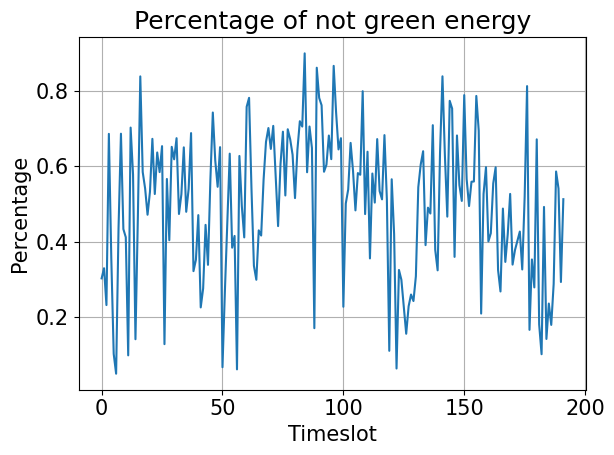

In [19]:
xpoints = np.arange(0, 192)
ypoints = array_bad
fig = plt.figure()
plt.rcParams.update({'font.size': 15})
plt.plot(xpoints, ypoints)
plt.xlabel(xlabel='Timeslot')
plt.ylabel(ylabel='Percentage')
plt.title('Percentage of not green energy')
plt.grid(True)
plt.tight_layout()
plt.show()